<a href="https://colab.research.google.com/github/futurebly/Web-AI/blob/main/Day8_%EC%8B%A4%EC%8A%B5_pandas%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pandas

## 라이브러리 가져오기

In [ ]:
import pandas as pd
import numpy as np #주로 배열을 이용할때 많이 씀

## 자료 구조

### Series
- 가장 기본이 되는 자료 구조로 1개의 열을 뜻함

In [ ]:
#시리즈는 1개의 자료 구조로 된 열. 1개의 열.
#nan 으로 결측치를 나타냄

#index가 0부터 자동으로 생성됨
obj = pd.Series([10,20,np.nan,30,40])
obj

0    10.0
1    20.0
2     NaN
3    30.0
4    40.0
dtype: float64

In [ ]:
#numpy로 series 생성
arr = np.arange(10,20)
arr

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
obj = pd.Series(arr)
obj
#0~는 index / 10~ values

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [ ]:
#value 확인
obj.values

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
#index 확인
obj.index

RangeIndex(start=0, stop=10, step=1)

In [ ]:
#임의의 index 사용 1
obj = pd.Series([10,20,30,40], index=['갑','을','병','정'])
obj

갑    10
을    20
병    30
정    40
dtype: int64

In [ ]:
#임의의 index 사용 2
#dictionary 사용
data = {"Seoul":350, 'Daegu':15, "Busan":30}
data

{'Busan': 30, 'Daegu': 15, 'Seoul': 350}

In [ ]:
obj = pd.Series(data)
obj

Seoul    350
Daegu     15
Busan     30
dtype: int64

In [ ]:
country = pd.Series(data)
country

Seoul    350
Daegu     15
Busan     30
dtype: int64

### Series 원소 선택

In [ ]:
#index 번호 사용
obj[2]

30

In [ ]:
#index 이름 사용
obj['Daegu']

15

In [ ]:
country[2]

30

In [ ]:
country[0]

350

In [ ]:
country['Seoul']

350

In [ ]:
#이중 대괄호로 여러 개 원소 선택 (index 이름 사용)
obj[['Seoul', 'Daegu']]

Seoul    350
Daegu     15
dtype: int64

In [ ]:
country[['Seoul', 'Daegu']]

Seoul    350
Daegu     15
dtype: int64

In [ ]:
#슬라이싱으로 여러 개 원소 선택 (index 번호 사용)
obj[1:3]

Daegu    15
Busan    30
dtype: int64

### DataFrame
- 행과 열로 구성된 2차원 배열
- 여러개의 Series(vector)가 모여 DataFrame(matrix)이 됨

In [ ]:
#Dictionary로 프레임 생성
#열로 변환
data = {'Seoul':[51621,307], 'Daegu':[10631,6], 'Busan':[6360,25]}
data

{'Busan': [6360, 25], 'Daegu': [10631, 6], 'Seoul': [51621, 307]}

In [ ]:
df = pd.DataFrame(data)
df
#Column들이 생기면서 그 안에 values들이 들어감. index도 자동으로 생성됨.

,Seoul,Daegu,Busan
0,51621,10631,6360
1,307,6,25


In [ ]:
# List로 프레임 생성
# 행으로 변환
data = [['Samsung', 80400,400], ['SK',12300,500], ['KaKao',15700,-2500], ['Naver',41000,-4000]]
data

[['Samsung', 80400, 400],
 ['SK', 12300, 500],
 ['KaKao', 15700, -2500],
 ['Naver', 41000, -4000]]

In [ ]:
df = pd.DataFrame(data)
df
#index는 모두 자동으로 생성되고, Column이 아니라 원소로 다 들어갔음

,0,1,2
0,Samsung,80400,400
1,SK,12300,500
2,KaKao,15700,-2500
3,Naver,41000,-4000


In [ ]:
# 임의의 행 인덱스, 열 이름
df.index = ['1st', '2nd', '3rd', '4th']
df.columns = ['title', 'price', 'change']
df

,title,price,change
1st,Samsung,80400,400
2nd,SK,12300,500
3rd,KaKao,15700,-2500
4th,Naver,41000,-4000


### 행과 열 삭제 - .drop()
- 행 삭제: .drop(index[,inplace=True])

In [ ]:
df

,title,price,change
1st,Samsung,80400,400
2nd,SK,12300,500
3rd,KaKao,15700,-2500
4th,Naver,41000,-4000


In [ ]:
#일시적으로 없애고 출력. 원본은 남아있음.
newdf = df.drop('4th')
newdf

,title,price,change
1st,Samsung,80400,400
2nd,SK,12300,500
3rd,KaKao,15700,-2500


In [ ]:
# 원본은 삭제되지 않았음을 확인
df

,title,price,change
1st,Samsung,80400,400
2nd,SK,12300,500
3rd,KaKao,15700,-2500
4th,Naver,41000,-4000


In [ ]:
# 원본 df의 행을 삭제 (inplace 옵션 True로 명시)
df.drop('4th', inplace=True)
df

,title,price,change
1st,Samsung,80400,400
2nd,SK,12300,500
3rd,KaKao,15700,-2500


- 열 삭제 .drop()

In [ ]:
# 해당 열이 삭제된 새로운 df를 반환
# 원본 열을 삭제하려면 행과 동일하게 inplace=True 명시
newDf = df.drop('price', axis=1)
newDf

,title,change
1st,Samsung,400
2nd,SK,500
3rd,KaKao,-2500


In [ ]:
# 원본은 삭제되지 않았음을 확인
df

,title,price,change
1st,Samsung,80400,400
2nd,SK,12300,500
3rd,KaKao,15700,-2500


### 행과 열 선택: .loc[]. .iloc[]

In [ ]:
data = [['Samsung', 80400, 400], ['SK', 12300, 500], ['Kakao', 15700, -2500], ['naver', 410000, -4000]]
df = pd.DataFrame(data)
df.index=['1st', '2nd', '3rd', '4th']
df.columns=['title', 'price', 'change']
df

,title,price,change
1st,Samsung,80400,400
2nd,SK,12300,500
3rd,Kakao,15700,-2500
4th,naver,410000,-4000


- 행 선택

In [ ]:
# 1개 행 선택 (인덱스 이름 사용) - .loc[인덱스 이름]
# 행과 열이 바껴서 출력됨(원본이 바뀌는건 아님)
df.loc['3rd']

title     Kakao
price     15700
change    -2500
Name: 3rd, dtype: object

In [ ]:
# 1개 행 선택 (인덱스 번호 사용) - .iloc[인덱스 번호]
# 행과 열이 바뀜
df.iloc[1]

title        SK
price     12300
change      500
Name: 2nd, dtype: object

In [ ]:
# 여러 행 선택 loc[[인덱스 이름, 인덱스 이름 , ,,,]] 사용
df.loc[['3rd', '2nd']]

,title,price,change
3rd,Kakao,15700,-2500
2nd,SK,12300,500


In [ ]:
# 여러 행 선택 iloc[[인덱스 번호, 인덱스 번호 , ,,,]] 사용
df.iloc[[2, 1]]

,title,price,change
3rd,Kakao,15700,-2500
2nd,SK,12300,500


In [ ]:
#여러 행 선택 슬라이싱 사용 - loc   end가 n-1이 아님
df.loc['1st':'3rd']

,title,price,change
1st,Samsung,80400,400
2nd,SK,12300,500
3rd,Kakao,15700,-2500


In [ ]:
#여러 행 선택 슬라이싱 사용 - iloc  * n-1까지 선택
df.iloc[0:2]

,title,price,change
1st,Samsung,80400,400
2nd,SK,12300,500


- 열 선택

In [ ]:
print(df)
# 열을 열의 인덱스 이름으로 가져오기
df['title']

       title   price  change
1st  Samsung   80400     400
2nd       SK   12300     500
3rd    Kakao   15700   -2500
4th    naver  410000   -4000


1st    Samsung
2nd         SK
3rd      Kakao
4th      naver
Name: title, dtype: object

In [ ]:
# 열을 열의 인덱스 번호로 가져오기
df.iloc[:, 1]
df['price']

1st     80400
2nd     12300
3rd     15700
4th    410000
Name: price, dtype: int64

In [ ]:
# 열을 슬라이싱으로 가져오기
print(df)
df.iloc[:, 1:3]

       title   price  change
1st  Samsung   80400     400
2nd       SK   12300     500
3rd    Kakao   15700   -2500
4th    naver  410000   -4000


,price,change
1st,80400,400
2nd,12300,500
3rd,15700,-2500
4th,410000,-4000


### 행과 열 추가

- 행 추가

In [ ]:
print(df)
# .loc[인덱스 이름]
df.loc['5th'] = ['LG', 870000, 21000]
df

       title   price  change
1st  Samsung   80400     400
2nd       SK   12300     500
3rd    Kakao   15700   -2500
4th    naver  410000   -4000


,title,price,change
1st,Samsung,80400,400
2nd,SK,12300,500
3rd,Kakao,15700,-2500
4th,naver,410000,-4000
5th,LG,870000,21000


- 열 추가

In [ ]:
df['rate'] = [0.5, 0.41, -1.57, -0.97, 2.47]
df

,title,price,change,rate
1st,Samsung,80400,400,0.50
2nd,SK,12300,500,0.41
3rd,Kakao,15700,-2500,-1.57
4th,naver,410000,-4000,-0.97
5th,LG,870000,21000,2.47


# DataFrame 간 연결/병합하여 데이터 가공

## pandas 라이브러리로 데이터프레임 합치기

### 두 데이터프레임 만들기

In [ ]:
df1 = pd.DataFrame({
    'id' : [1,2,3],
    'customer_id' : [1,2,3],
    'customer_name' : ['Robert', 'Peter', 'Dave']
})
df1

,id,customer_id,customer_name
0,1,1,Robert
1,2,2,Peter
2,3,3,Dave


In [ ]:
df2 = pd.DataFrame({
    'id' : [1,2,4],
    'order_id' : [100,200,300],
    'order_date' : ['2021-01-21', '2021-02-03', '2020-10-01']
})
df2

,id,order_id,order_date
0,1,100,2021-01-21
1,2,200,2021-02-03
2,4,300,2020-10-01


### 두 데이터프레임 연결하기

- concat() : 두 데이터프레임을 연결해서 하나의 데이터프레임으로 만들 수 있음
-- 두 데이터프레임을 위/아래 또는 왼쪽/오른쪽으로 연결하기만 함
-- pd.concat(데이터프레임1, 데이터프레임2)

In [ ]:
pd.concat([df1, df2])

,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,NaN,NaN
1,2,2.0,Peter,NaN,NaN
2,3,3.0,Dave,NaN,NaN
0,1,NaN,NaN,100.0,2021-01-21
1,2,NaN,NaN,200.0,2021-02-03
2,4,NaN,NaN,300.0,2020-10-01


- axis=0(default)이면 위에서 아래로 합치고 1이면 왼쪽과 오른쪽으로 합쳐짐

In [ ]:
doc = pd.concat([df1, df2], axis=1)
doc

,id,customer_id,customer_name,id,order_id,order_date
0,1,1,Robert,1,100,2021-01-21
1,2,2,Peter,2,200,2021-02-03
2,3,3,Dave,4,300,2020-10-01


### 두 프레임 합치기(병합하기)

- merge() : 두 개 프레임 합치기
-- merge(데이터프레임1, 데이터프레임2) : 두 데이터프레임에 동일한 이름을 가진 컬럼을 기준으로 두 데이터프레임을 합침

In [ ]:
pd.merge(df1, df2)

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


- merge(데이터프레임1, 데이터프레임2, on=기준컬럼명) : 기준 컬럼을 명시할 수 있음

In [ ]:
pd.merge(df1, df2, on='id')

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


- merge() 를 통해 어떻게 두 데이터프레임을 결합시킬 것인가에 대한 상세한 기능을 제공
-- inner : 내부조인 – 교집합 조인(디폴트)
-- outer : 완전 외부 조인 – 어느한쪽에라도 없는 데이터가 있는 경우 NaN값이 지정
-- left : 왼쪽 우선 외부 조인 – SQL의 LEFT OUTER JOIN과 동일
-- right : 오른쪽 우선 외부 조인 - SQL의 RIGHT OUTER JOIN 과 동일

In [ ]:
#df1기준
pd.merge(df1, df2, how='left')

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100.0,2021-01-21
1,2,2,Peter,200.0,2021-02-03
2,3,3,Dave,NaN,NaN


In [ ]:
#df2기준
pd.merge(df1, df2, how='right')

,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,100,2021-01-21
1,2,2.0,Peter,200,2021-02-03
2,4,NaN,NaN,300,2020-10-01


- inner 내부 조인
-- on의 컬럼값이 두 데이터프레임에서 동일한 행 찾기
-- 각 동일한 행의 컬럼/컬럼값만 가져오기

In [ ]:
#교집합
pd.merge(df1, df2, on='id', how='inner')

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


- outer 완전 외부 조인
-- on의 컬럼값이 두 데이터프레임에서 동일한 행 찾기
-- 각 동일한 행의 컬럼/컬럼값 가져와 붙이기
-- 각 데이터프레임에서 on의 컬럼값이 다른 나머지 행을 찾기
-- 각 나머지 행의 컬럼/컬럼값을 가져와 별도 행으로 붙이기
-- 두 데이터프레임 각각에만 있는 컬럼이어서 컬럼값이 없을 경우 데이터 없음(NaN)으로 표기

In [ ]:
#합집합 느낌. inner는 교집합만 조인(디폴트)
pd.merge(df1, df2, how='outer')

,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,100.0,2021-01-21
1,2,2.0,Peter,200.0,2021-02-03
2,3,3.0,Dave,NaN,NaN
3,4,NaN,NaN,300.0,2020-10-01


# 타이타닉호 생존율 분석

## csv 파일 입출력

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 데이터프레임의 컬럼 타입, null 개수, 데이터 분포 등 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 데이터 분석&처리
- 데이터프레임의 컬럼 타입, null 개수, 데이터 분포 등 정보 확인

In [ ]:
data['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

- 컬럼의 unique value의 수를 카운트 : value_counts()

In [ ]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# index 기준으로 오름차순 정렬
s = data['Pclass'].value_counts()
s.sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [ ]:
# value 기준으로 내림차순 정렬
s.sort_values(ascending=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# 성별 카운트
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

- 칼럼의 평균: mean()

In [ ]:
age_mean = data['Age'].mean()
age_mean

29.69911764705882

In [ ]:
data['Fare'].mean()

32.2042079685746

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 조건식

In [ ]:
data['Survived'] == 0

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Survived, Length: 891, dtype: bool

In [ ]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
dead = data[data['Survived']==0]
dead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
survived = data[data['Survived']==1]
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
len(dead)

549

In [ ]:
len(survived)

342

In [ ]:
male = data[data['Sex']=='male']
female = data[data['Sex']=='female']
len(male)

577

In [ ]:
len(female)

314

In [ ]:
schildren = data[(data['Survived']==1) & (data['Age']<=17)]
schildren

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,NaN,Q
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.00,1,0,2659,14.4542,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.00,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S


In [ ]:
len(schildren)

61

In [ ]:
children = data[data['Age']<=17]
len(children)

113

In [ ]:
print(len(schildren)/len(children)*100)

53.98230088495575


- 60세 이상 생존비율을 구하시오.

In [ ]:
selder = data[(data['Age']>=60) & (data['Survived']==1)]
len(selder)

7

In [ ]:
elder = data[data['Age']>=60]
len(elder)

26

In [ ]:
selderrate = len(selder) / len(elder) * 100
selderrate

26.923076923076923

- 18세 미만의 남자 아이 정보와 수를 출력해 보자

In [ ]:
boy = data[(data.Age < 18) & (data.Sex == 'male')]
len(boy)

58

In [ ]:
# 성별에 따른 생존자 수
survived = data[data.Survived == 1]['Sex'].value_counts()
survived

female    233
male      109
Name: Sex, dtype: int64

In [ ]:
# 객실 등급별 생존자 수
survivedPclass = data[data.Survived == 1]['Pclass'].value_counts()
survivedPclass

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [ ]:
# 항구 별 생존자 수
survivedEmbarked = data[data.Survived == 1]['Embarked'].value_counts()
survivedEmbarked

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [ ]:
# 항구 별 탑승자 수(생존자 + 사망자 수)
embarked = data['Embarked'].value_counts()
embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 그룹화 : groupby()

In [ ]:
# 객실 등급별 요금 평균
print(data['Fare'].groupby(data['Pclass']).mean())

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [ ]:
# 성별 나이 평균
print(data['Age'].groupby(data['Sex']).mean())

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


## 비어있는 값 채우기: fillna()
- 데이터 전처리 할때, 제일 처음이 결측치 삭제, 그다음은 이상치 삭제

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
data['Cabin'].isnull().sum()

687

In [ ]:
data['Age'].isnull().sum()

177

In [ ]:
data['Embarked'].isnull().sum()

2

### 중간값으로 채우기

In [ ]:
data['Age'].median()

28.0

In [ ]:
data['Age'].mean()

29.36158249158249

In [ ]:
#inplace=True는 원본까지 바꾼다
data['Age'].fillna(data['Age'].median(),inplace=True)

In [ ]:
data['Age'].isnull().sum()

0

### 최빈값 채우기
- idxmax() : 최대값을 가지는 index label 반환

In [ ]:
data['Embarked'].value_counts().idxmax()

'S'

In [ ]:
data['Embarked'].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### column 삭제
- dropna() : 결측값 삭제
- axis = 0 결측값이 있는 행 전체 삭제
- axis = 1 결측값이 있는 열 전체 삭제

In [ ]:
data.dropna(axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## 시각화

In [ ]:
# plot 내장 함수로 차트 생성 (kind='line|bar|bath|hist|pie|scatter')
survived = data[data.Survived == 1]['Sex'].value_counts()
print(survived)

female    233
male      109
Name: Sex, dtype: int64


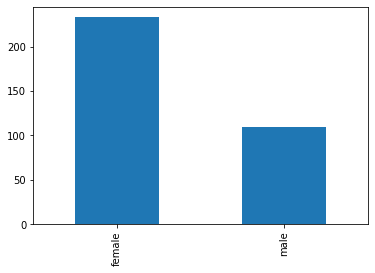

In [ ]:
survived.plot(kind='bar')

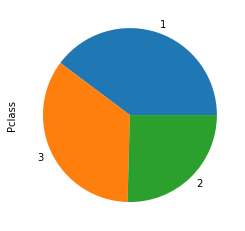

In [ ]:
survived = data[data['Survived']==1]['Pclass'].value_counts()
survived.plot(kind='pie')

In [ ]:
grouped = data['Fare'].groupby(data['Pclass']).mean()
grouped

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

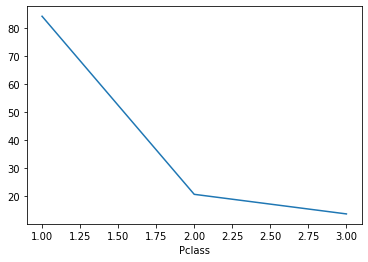

In [ ]:
grouped.plot(kind='line')

# 실습(used_car.csv)
- 데이터 상위 5개 행 출력
- 데이터 정보 출력
- 연식별 판매 차량 대수를 테이블과 바 그래프로 출력(연식 기준 오름차순)
- 연식별 판매 가격 평균을 테이블과 라인 그래프로 출력(연식 기준 오름차순)
- 전체 판매 차량의 수동/자동 비율을 파이 차트로 출력

In [ ]:
import pandas as pd
car = pd.read_csv('used_car.csv')
car.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
car['Year'].value_counts().sort_index()

1998      4
1999      2
2000      4
2001      8
2002     15
2003     17
2004     31
2005     57
2006     78
2007    125
2008    174
2009    198
2010    342
2011    466
2012    580
2013    649
2014    797
2015    744
2016    741
2017    587
2018    298
2019    102
Name: Year, dtype: int64

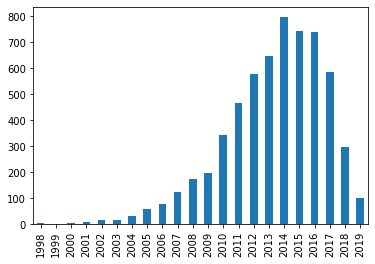

In [ ]:
yearcar = car['Year'].value_counts().sort_index()
yearcar.plot(kind='bar')

In [ ]:
car['Price'].groupby(car['Year']).mean().sort_index()

Year
1998     1.432500
1999     0.835000
2000     1.175000
2001     1.543750
2002     1.294000
2003     2.440000
2004     1.941290
2005     2.026842
2006     3.355897
2007     3.204000
2008     3.917759
2009     5.177727
2010     5.515497
2011     6.831931
2012     7.324724
2013     8.699353
2014     9.639360
2015    11.215538
2016    11.719096
2017    13.764940
2018    15.726141
2019    19.464118
Name: Price, dtype: float64

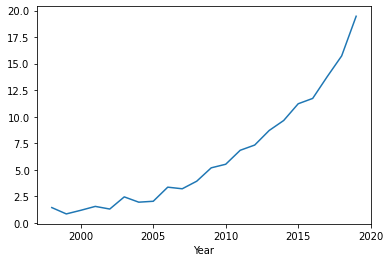

In [ ]:
yearprice = car['Price'].groupby(car['Year']).mean().sort_index()
yearprice.plot(kind='line')

In [ ]:
car['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

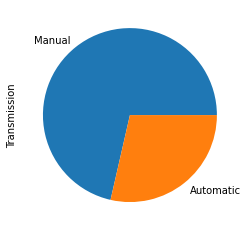

In [ ]:
transcar = car['Transmission'].value_counts()
transcar.plot(kind='pie')

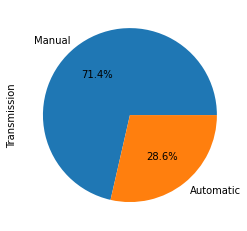

In [ ]:
transcar = car['Transmission'].value_counts()
transcar.plot(kind='pie', autopct='%.1f%%')

# 졸음운전 데이터 분석
- 3개의 데이터를 병합한다.(concat())
- 년도, 월별로 인덱스를 설정하고 데이터를 출력한다.
- 년도 및 월별 평균 사망자를 출력한다.
- 2016년 사고대비 사망율을 구한다.
- 2014년도 월별 사망, 부상 데이터를 바차트로 보여 준다.
- 2015년 대비 사망이 가장 많이 증가한 2016년도 월을 구한다.

## 라이브러리 import 및 파일 불러오기

### 필요한 라이브러리 import

### 파일 불러오기

## 3개의 데이터 병합

## 년도, 월별로 인덱스 설정

## 년도 및 월별 평균 사망자

## 2016년 사고 대비 사망율

## 2014년도 월별 사망, 부상 데이터 시각화
- 구글 코랩 한글 시각화

## 2015년 대비 사망이 가장 많이 증가한 2016년도의 월은?
- 값이 높은 n번째 까지 출력 : nlargest

      Series.nlargest(n, keep='first')

     - n : 상의 몇 개까지 나타낼 것인가

     - keep = 'first' : 동등한 값이 있다면 제일 먼저 나온 값을 보여 준다.

     - keep = 'all' : 동등한 값을 모두 표시한다.